<a href="https://colab.research.google.com/github/ciceroed/CAN/blob/main/Exerc%C3%ADcios%20-%20Cap%C3%ADtulo%207/Capitulo_7_Exercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 A medição de alguns pontos de uma curva de saturação magnética (Bx
H) num processo de desmagnetização do ferrite MnZn3C15 é:

| H (A/m) | -50 |  -5 |  5  | 75 |
|---------|-----|-----|-----|----|
| B (mT)  |-300 | -50 | 180 |350 |

Determine o valor da indução magnética para H = 0 A/m.

s = 62.81385281385282


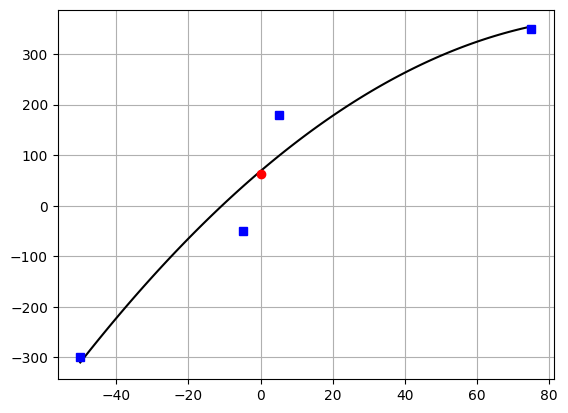

In [2]:
# Cálculo numérico para engenharia elétrica com PYTHON
# Capítulo 7: Ajuste de curvas
# Polinômios interpoladores de Lagrange


import matplotlib.pyplot as plt
import numpy as np


x = ([-50, -5, 5, 75])
y = ([-300, -50, 180, 350])
xx = 0
n = len(x)  # número de amostras
if len(y) != n:
    print('x e y devem ter o mesmo tamanho')
s = 0
for i in range(0, n):
    produto = y[i]
    for j in range(0, n):
        if i != j:
            produto = produto * (xx - x[j]) / (x[i] - x[j])
    s = s + produto
print(f's = {s}')

# gráfico
plt.grid(True)
c = np.polyfit(x, y, 2)
x_polyfit = np.linspace(min(x), max(x), 100)
y_polyfit = np.polyval(c, x_polyfit)
plt.plot(x_polyfit, y_polyfit, 'k')
plt.plot(x, y, 'bs')
plt.plot(xx, s, 'ro')
plt.show()

In [4]:
# Código obtido pelo github de Gabrielmazz
# Link do repositório: https://github.com/gabrielmazz/interpolador_newton/blob/main/interpolador_newton.py



import sympy as sp
import numpy as np

"""
    Este trecho de código define a função "interp_newton" que recebe como entrada dois arrays, "x" e "y", que representam os pontos para interpolação. A função retorna uma outra função, "p(z)",
    que é a interpolação dos pontos usando o Método de Newton. A função interp_newton começa armazenando o tamanho dos arrays "x" e "y" na variável "n". Em seguida, cria uma cópia dos valores de
    "y" e armazena na variável "a". Depois, é realizado um loop de "j" que vai de 1 até n-1, e dentro deste loop, é realizado outro loop de "i" que vai de n-1 até j-1, decrementando de 1 em 1.
    Durante o loop de "i", o valor da interpolação é calculado usando o Método de Newton. Por fim, a função "p(z)" é definida como o resultado da interpolação usando o Método de Newton, e é
    retornada ao final da função "interp_newton".
"""

def interp_newton(x, y):
    # Guarda o tamanho dos arrays x e y na variável n
    n = len(x)

    # Cria uma cópia dos valores de y e guarda na variável a
    a = y.copy()

    # Loop de j que vai de 1 até n-1
    for j in range(1, n):

        # Loop de i que vai de n-1 até j-1, decrementando de 1 em 1
        for i in range(n-1, j-1, -1):

            # Calcula o valor da interpolação usando o método de Newton
            a[i] = (a[i] - a[i-1]) / (x[i] - x[i-j])

    # Define a função p(z) como o resultado da interpolação usando o método de Newton
    def p(z):
        val = a[n-1]
        for i in range(n-2, -1, -1):
            val = val * (z - x[i]) + a[i]
        return val

    # Retorna a função p(z)
    return p

# Transforma os pontos de string para uma array de inteiros
x = ([-50, -5, 5, 75])
y = ([-300, -50, 180, 350])

est = 0

# Recebe a interpolação vinda da função
P = interp_newton(x, y)

# Cria o polinomio
x_sym = sp.symbols('x')
polinomio = sp.poly(P(x_sym), x_sym)

# Imprime o polinômio interpolador
print(f"\nO polinômio interpolador de Newton é:")
print(sp.simplify(str(polinomio.as_expr())))

# Verifica a estimativa que foi pedida
x = sp.Symbol('x')

print(f"\nO resultado da estimativa para o valor de f({est}) é:")
print(sp.simplify(polinomio.subs(x, est)))


O polinômio interpolador de Newton é:
-0.00459451659451659*x**3 + 0.0874458874458874*x**2 + 23.1148629148629*x + 62.8138528138528

O resultado da estimativa para o valor de f(0) é:
62.8138528138528
